## Bayesian normal mean model

# Intuition
Bayesian 

**FIGURE PLACEHOLDER:** ![Likelihood Intuition Cartoon](image_placeholder)

# Definition

## Bayesian Inference

Bayesian inference is a method of statistical inference in which we update the probability estimate for a hypothesis as more evidence or information becomes available. The key components are:

- **Prior**: The initial belief or probability about a parameter before any data is observed.
- **Likelihood**: The probability of the observed data given a particular hypothesis or parameter.
- **Posterior**: The updated probability of the hypothesis after incorporating the data.

The core formula of Bayesian inference is:

$$
P(\theta|D) = \frac{P(D|\theta) P(\theta)}{P(D)}
$$

Where:
- $ P(\theta|D) $ is the **posterior** probability of the parameter $\theta$ given the data $D$.
- $ P(D|\theta) $ is the **likelihood** of the data given the parameter $\theta$.
- $ P(\theta) $ is the **prior** probability of the parameter $\theta$.
- $ P(D) $ is the **marginal likelihood** or evidence, which is the probability of the data under all possible values of the parameter.

By Bayes' theorem, we can simplify this as:

$$
P(\theta|D) \propto P(D|\theta) P(\theta)
$$


When comparing two models $M_1$ and $M_2$, we calculate the **posterior odds** for each model. The **posterior odds** represent the ratio of the posterior probabilities for the two models. This can be written as:

$$
\frac{P(M_1|D)}{P(M_2|D)} = \frac{P(D|M_1)P(M_1)}{P(D|M_2)P(M_2)}
$$

Where:
- $P(M_1|D)$ is the **posterior** probability of model $M_1$ given the data $D$.
- $P(M_2|D)$ is the **posterior** probability of model $M_2$ given the data $D$.
- $P(D|M_1)$ and $P(D|M_2)$ are the **likelihoods** of the data under models $M_1$ and $M_2$, respectively.
- $P(M_1)$ and $P(M_2)$ are the **prior probabilities** of models $M_1$ and $M_2$, respectively.

This ratio simplifies to:

$$
\text{Posterior Odds} = \text{Prior Odds} \times \text{Likelihood Ratio (LR)}
$$

Where:
- **Prior Odds** = $\frac{P(M_1)}{P(M_2)}$ is the ratio of prior probabilities of the models.
- **Likelihood Ratio (LR)** = $\frac{P(D|M_1)}{P(D|M_2)}$ is the ratio of the likelihoods of the data under each model.

Thus, the **posterior odds** can be updated by multiplying the **prior odds** by the **likelihood ratio**.

## Normal Mean Model

Let’s now consider the normal mean model where we assume data points $x_1, x_2, \dots, x_n$ are drawn from a normal distribution with unknown mean $\mu$ and known variance $\sigma^2$:

$$
x_i \sim N(\mu, \sigma^2)
$$

In this case:

1. **Prior**: The prior distribution for the mean $\mu$ is often assumed to be normal with mean $\mu_0$ and variance $\sigma_0^2$, and let's work with the precision $\tau=\frac{1}{\sigma^2}$ instead of the variance $\sigma^2$.

$$
P(\mu) = \frac{1}{\sqrt{2 \pi \sigma_0^2}} \exp\left(-\frac{(\mu - \mu_0)^2}{2 \sigma_0^2}\right)\\
% \propto \exp\left(−0.5\tau_0\mu^2+\tau_0\mu_0\mu\right) \\
\propto \exp\left(−0.5\tau_0(\mu-\mu_0)^2\right)
$$

In other words, the prior of $\mu \sim N(\mu_0, \frac{1}{\sigma_0^2})$ (i.e., $\sim N(\mu_0, \tau_0$).
(Here the 0 subscript is being used to indicate that $\mu_0$, $\sigma_0$ are parameters in the prior.)


2. **Likelihood**: The likelihood of observing the data given $\mu$ is:

$$
P(D|\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2 \sigma^2}\right) \\
\propto \prod_{i=1}^{n}\exp\left(-\frac{(x_i - \mu)^2}{2 \sigma^2}\right) \\
% \propto \prod_{i=1}^{n}\exp\left(−0.5\tau x_i^2+\tau x_i\mu\right) \\
\propto \prod_{i=1}^{n} \exp\left(−0.5 \tau (x_i - \mu)^2\right)
$$

3. **Posterior**: The posterior distribution of $\mu$ given the data $D = \{x_1, x_2, \dots, x_n\}$ combines the prior and likelihood using Bayes' theorem. The formula for the posterior is proportional to:

$$
P(\mu|D) \propto P(D|\mu) P(\mu) \\
\propto \prod_{i=1}^{n} \exp\left(−0.5 \tau (x_i - \mu)^2\right) \times \exp\left(−0.5 \tau_0 (\mu - \mu_0)^2\right)\\
\propto \exp\left[−0.5 \tau \sum_{i=1}^{n} (x_i - \mu)^2 − 0.5 \tau_0 (\mu - \mu_0)^2\right]\\
\propto \exp\left[−0.5 (\tau + \tau_0) \mu^2 + \left( \sum_{i=1}^{n} x_i \tau + \mu_0 \tau_0 \right) \mu \right]
$$

From the result in “Preliminaries” above we see that
$$
\mu | X \sim N(\mu_1, \frac{1}{\tau_1})
$$
where:
- $\tau_1 = \tau + \tau_0$ is the posterior precision (i.e., $\sigma_1^2 = \frac{1}{\frac{1}{\sigma_1^2} + \frac{n}{\sigma^2}}$ is the posterior variance.)
- $\mu_1 = \frac{\sum_{i=1}^{n} x_i \tau + \mu_0 \tau_0}{\tau + \tau_0}$ is the posterior mean.


## Summary
- **Bayes' theorem** combines these components: $P(\mu|D) \propto P(D|\mu) P(\mu)$.
- The **prior** represents our belief about the parameter before seeing any data.
- The **likelihood** represents how likely we are to observe the data given the parameter.
- The **posterior** is the updated belief about the parameter after seeing the data.
    - the **Posterior precision** ($\tau_1$) is the sum of the Data precision ($\tau$) and the Prior precision ($\tau_0$). This makes sense: the more precise your data, and the more precise your prior information, the more precise your posterior information. Also, this means that the data always improves your posterior precision compared with the prior: noisy data (small $\tau$) improves it only a little, whereas precise data improves it a lot.
    - If we rewrite the **posterior mean** as:
    $$
    \mu_1=w\sum_i^n x_i+(1−w)\mu_0
    $$
    where $w=\tau/(\tau+\tau_0)$. Thus $\mu_1$ is a weighted average of the sum of the data $x_i$ and the prior mean $\mu_0$. And the weights depend on the relative precision of the data and the prior. If the data are precise compared with the prior ($\tau>>\tau_0$) then the weight w will be close to 1 and the posterior mean will be close to the data.

# Example

## Description (same as notebook 6_1)

We continue to use the example in lecture 6, comparing two models to assess the effect of a genetic variant on a trait such as height. This approach follows the Bayesian normal mean model, which provides a conjugate framework for inference.

1. **Model 1 ($M_1$)**: This model assumes that the genetic variant has no effect on the trait. Assumes the trait $y$ is normally distributed with mean 0 (no genetic effect) and standard deviation $\sigma$.
$$
y_i \sim \mathcal{N}(0, \sigma^2)
$$
where $y_i$ ($i=1,...,n$) is the observed trait value for individual $i$.

2. **Model 2 ($M_2$)**: This model assumes that the genetic variant has an effect on the trait. Assumes the trait is normally distributed with mean 1 (genetic effect $\beta$), where $x_i$ is the genotype (coded as 0, 1, or 2 for the number of copies of the minor allele).
  
$$
y_i \sim \mathcal{N}(1, \sigma^2)
$$

In [37]:
rm(list=ls())
set.seed(927)
# Simulate genotypes (0, 1, 2)
n <- 3  # number of individuals
genotypes <- sample(0:2, n, replace = TRUE)

# Simulate true mean and effect size
mu_0 <- 0  # population mean of the trait (e.g., height in cm) under Model 1
beta_true <- 1  # true effect size of the genetic variant
sigma <- 0.4  # standard deviation of the trait

# Simulate trait values based on the model 2
trait_values <- rnorm(n, mean = mu_0 + beta_true * genotypes, sd = sigma)

# Data preview
data.frame(genotype = genotypes, trait = trait_values)

genotype,trait
<int>,<dbl>
2,1.5932759
2,2.1235810
0,-0.4162047


## Bayesian Inference

We assume a normal prior for the effect size $\beta$:
$$
\beta \sim \mathcal{N}(\beta_0, 1/\tau_0).
$$
Using Bayesian updating, the posterior distribution of $\beta$ is given by:
$$
\beta | x \sim \mathcal{N}(\beta_1, 1/\tau_1),
$$
where:
- $\tau_1 = \tau + \tau_0$ (posterior precision is the sum of data and prior precision),
- $\beta_1 = \frac{\sum_{i=1}^{n} x_i \tau + \beta_0 \tau_0}{\tau + \tau_0}$ (posterior mean is a weighted estimate incorporating both data and prior information).

In [38]:
# Create a grid of beta values
beta_vals <- seq(-1, 2, length.out = 100)

### Prior distribution

In [46]:
# prior parameters
mu_0 <- 0  # Prior mean
sigma_0 <- 0.5  # Prior standard deviation
tau_0 <- 1 / sigma_0^2
# Compute densities
prior_density <- dnorm(beta_vals, mean = mu_0, sd = sigma_0)

# Print prior information
cat("Prior Information for mu:\n")
cat("Mean of mu_0:", mu_0, "\n")
cat("Standard Deviation (sigma_0):", sigma_0, "\n")
cat("Precision (tau_0 = 1/sigma_0^2):", tau_0, "\n")

Prior Information for mu:
Mean of mu_0: 0 
Standard Deviation (sigma_0): 0.5 
Precision (tau_0 = 1/sigma_0^2): 4 


### Likelihood

In [40]:
likelihood_density <- dnorm(beta_vals, mean = mean(trait_values), sd = sigma / sqrt(n))

### Posterior distribution

In [47]:
# Compute posterior parameters
tau <- 1 / sigma^2
tau_1 <- tau_0 + n * tau  # Posterior precision
mu_1 <- (sum(trait_values) * tau + mu_0 * tau_0) / tau_1  # Posterior mean
sigma_1 <- sqrt(1 / tau_1)  # Posterior standard deviation

# Compute densities
posterior_density <- dnorm(beta_vals, mean = mu_1, sd = sigma_1)

# Print posterior information
cat("Posterior Information for mu:\n")
cat("Mean (mu_1):", mu_1, "\n")
cat("Standard Deviation (sigma_1):", sigma_1, "\n")
cat("Precision (tau_1 = 1/sigma_1^2):", tau_1, "\n")

Posterior Information for mu:
Mean (mu_1): 0.9067726 
Standard Deviation (sigma_1): 0.209657 
Precision (tau_1 = 1/sigma_1^2): 22.75 


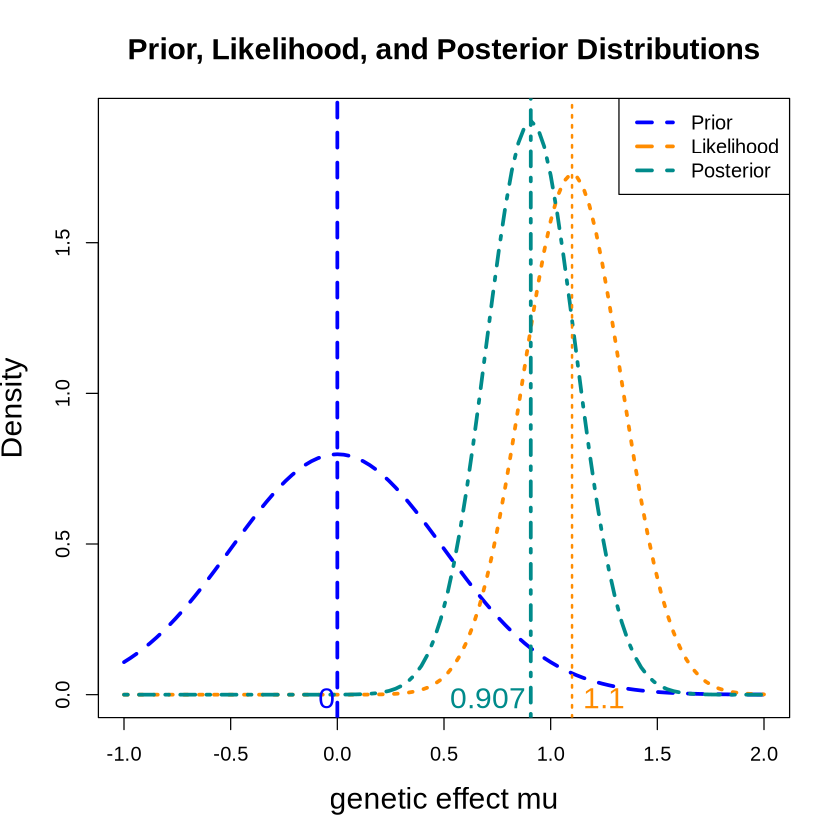

In [130]:
# Plot prior density with thicker lines and larger font
plot(beta_vals, prior_density, type = "l", col = "blue", lwd = 3, 
     ylim = c(0, max(c(prior_density, likelihood_density, posterior_density))),
     xlab ="genetic effect mu", ylab = "Density", 
     main = "Prior, Likelihood, and Posterior Distributions", cex.lab = 1.5, cex.main = 1.5, lty = 2)

# Add likelihood and posterior densities with thicker lines and more distinct colors
lines(beta_vals, likelihood_density, col = "darkorange", lwd = 3, lty = 3)
lines(beta_vals, posterior_density, col = "darkcyan", lwd = 3, lty = 4)

# Add legend
legend("topright", legend = c("Prior", "Likelihood", "Posterior"),
       col = c("blue", "darkorange", "darkcyan"), lwd = 3, lty = 2, cex = 1)

# Add vertical lines for means
abline(v = mu_0, col = "blue", lty = 2, lwd = 3)
abline(v = mean(trait_values), col = "darkorange", lty = 3, lwd = 2)
abline(v = mu_1, col = "darkcyan", lty = 4, lwd = 3)

# Label x-axis with mean values with larger font
text(mu_0-0.05, 0.05, labels = round(mu_0, 3), col = "blue", cex = 1.5, pos = 1)
text(mean(trait_values)+0.15, 0.05, labels = round(mean(trait_values), 3), col = "darkorange", cex = 1.5, pos = 1)
text(mu_1-0.2, 0.05, labels = round(mu_1, 3), col = "darkcyan", cex = 1.5, pos = 1)
